In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import matplotlib.patches as mpatches

from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

from time import perf_counter 

# Modeling

In [2]:
# loading training set
train_set = image_dataset_from_directory(
    '../hh_multi/data/original/train/',
    label_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = 100,
    image_size = (416,416)
)

Found 6051 files belonging to 3 classes.


In [3]:
# load test set
test_set = image_dataset_from_directory(
    '../hh_multi/data/original/test/',
    label_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = 100,
    image_size = (416,416)
)

Found 1986 files belonging to 3 classes.


In [4]:
train_set.class_names

['both', 'hard_hat', 'not_hh']

In [5]:
test_set.class_names

['both', 'hard_hat', 'not_hh']

## NN

In [6]:
cnn = Sequential(layers.BatchNormalization())

In [7]:
cnn.add(Conv2D(filters = 16,
              kernel_size = (3,3),
              activation = 'relu',
              input_shape = (416,416,1)))

In [8]:
cnn.add(MaxPooling2D(pool_size = (2,2)))

In [9]:
cnn.add(Conv2D(filters = 32,
                     kernel_size = (3,3),
                     activation = 'relu'))

In [10]:
cnn.add(MaxPooling2D(pool_size = (2,2)))

In [11]:
cnn.add(Conv2D(filters = 64,
                     kernel_size = (3,3),
                     activation = 'relu'))

In [12]:
cnn.add(MaxPooling2D(pool_size = (2,2)))

In [13]:
cnn.add(Conv2D(filters = 128,
                     kernel_size = (3,3),
                     activation = 'relu'))

In [14]:
cnn.add(MaxPooling2D(pool_size = (2,2)))

In [15]:
cnn.add(Conv2D(filters = 256,
                     kernel_size = (3,3),
                     activation = 'relu'))

In [16]:
cnn.add(MaxPooling2D(pool_size = (2,2)))

In [17]:
cnn.add(Conv2D(filters = 512,
              kernel_size = (3,3),
              activation = 'relu',
              input_shape = (416,416,1)))

In [18]:
cnn.add(MaxPooling2D(pool_size = (2,2)))

In [19]:
cnn.add(Conv2D(filters = 1024,
                     kernel_size = (3,3),
                     activation = 'relu'))

In [20]:
cnn.add(MaxPooling2D(pool_size = (2,2)))

In [21]:
cnn.add(Flatten())

In [22]:
cnn.add(Dense(2048, activation = 'relu'))

In [23]:
cnn.add(Dense(3,activation = 'softmax'))

In [24]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy','Recall','Precision'])

In [25]:
early_stop = EarlyStopping(monitor = 'accuracy',min_delta = 0, 
                           patience = 5,verbose = 1,mode = 'auto')

In [26]:
History = cnn.fit(train_set, validation_data = test_set,epochs = 5,workers = 12, callbacks = early_stop)

Epoch 1/5
61/61 [==============================] - 668s 11s/step - loss: 0.9474 - accuracy: 0.7019 - recall: 0.4866 - precision: 0.7114 - val_loss: 0.8067 - val_accuracy: 0.7185 - val_recall: 0.7185 - val_precision: 0.7185
Epoch 2/5
61/61 [==============================] - 639s 10s/step - loss: 0.7535 - accuracy: 0.7110 - recall: 0.7029 - precision: 0.7154 - val_loss: 0.7235 - val_accuracy: 0.7185 - val_recall: 0.7160 - val_precision: 0.7266
Epoch 3/5
61/61 [==============================] - 645s 11s/step - loss: 0.6867 - accuracy: 0.7226 - recall: 0.6788 - precision: 0.7608 - val_loss: 0.6440 - val_accuracy: 0.7603 - val_recall: 0.7341 - val_precision: 0.7772
Epoch 4/5
61/61 [==============================] - 640s 10s/step - loss: 0.6286 - accuracy: 0.7597 - recall: 0.7321 - precision: 0.7833 - val_loss: 0.6299 - val_accuracy: 0.7734 - val_recall: 0.7563 - val_precision: 0.7803
Epoch 5/5
61/61 [==============================] - 637s 10s/step - loss: 0.5723 - accuracy: 0.7857 - recall:

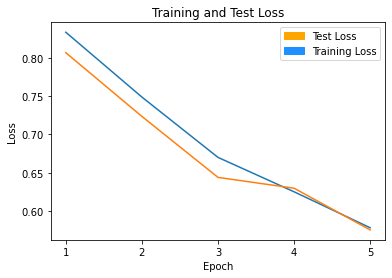

In [37]:
ax1 = plt.plot(History.history['loss'],label = 'training loss')
ax2 = plt.plot(History.history['val_loss'],label = 'test loss')

plt.legend(loc='lower right')
blue_patch = mpatches.Patch(color='dodgerblue', label='Training Loss')
red_patch = mpatches.Patch(color='orange', label='Test Loss')
plt.legend(handles=[red_patch,blue_patch])

positions = range(5)
labels = (1,2,3,4,5)
plt.xticks(positions,labels)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss');

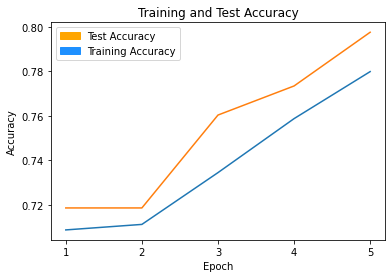

In [36]:
ax1 = plt.plot(History.history['accuracy'],label = 'Training Accuracy')
ax2 = plt.plot(History.history['val_accuracy'],label = 'Test Accuracy')

plt.legend(loc='upper right')
blue_patch = mpatches.Patch(color='dodgerblue', label='Training Accuracy')
red_patch = mpatches.Patch(color='orange', label='Test Accuracy')
plt.legend(handles=[red_patch,blue_patch])

positions = range(5)
labels = (1,2,3,4,5)
plt.xticks(positions,labels)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy');

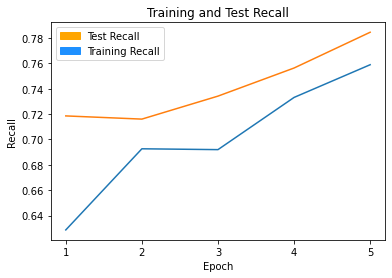

In [38]:
ax1 = plt.plot(History.history['recall'],label = 'training Recall')
ax2 = plt.plot(History.history['val_recall'],label = 'test Recall')

plt.legend(loc='lower right')
blue_patch = mpatches.Patch(color='dodgerblue', label='Training Recall')
red_patch = mpatches.Patch(color='orange', label='Test Recall')
plt.legend(handles=[red_patch,blue_patch])

positions = range(5)
labels = (1,2,3,4,5)
plt.xticks(positions,labels)

plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Training and Test Recall');

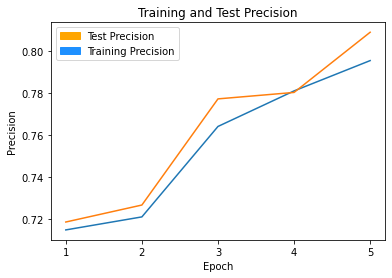

In [39]:
ax1 = plt.plot(History.history['precision'],label = 'training Precision')
ax2 = plt.plot(History.history['val_precision'],label = 'test Precision')

plt.legend(loc='lower right')
blue_patch = mpatches.Patch(color='dodgerblue', label='Training Precision')
red_patch = mpatches.Patch(color='orange', label='Test Precision')
plt.legend(handles=[red_patch,blue_patch])

positions = range(5)
labels = (1,2,3,4,5)
plt.xticks(positions,labels)

plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Training and Test Precision');